# INFO133 : Caso de Estudio "Yapo"  

---

__PARTE PRÁCTICA__

__Nombre:__ Claudia Arias

__Nota:__ Para el desarrolo de este notebook se utilizaron datos recopilados en [Yapo1](https://github.com/clfak/INFO133/blob/master/BBD/Trabajo%20Pr%C3%A1ctico/Yapo1.ipynb) los días 27 y 28 de agosto. Se utilizó tambien el archivo [dump-yapo.sql](https://github.com/clfak/INFO133/blob/master/BBD/Trabajo%20Pr%C3%A1ctico/dump-yapo.sql) con datos correspondientes a los días 18 y 19 de agosto.(Se integraron todos estos datos en usa sola base de datos).   

In [151]:
import mysql.connector
db_connection = mysql.connector.connect(user="root",host="localhost",password="password")
cursor = db_connection.cursor()
cursor.execute("USE Yapo")

### Pregunta 5: Consultas SQL

__5.1__ ¿Cuál es el precio promedio de los anuncios por categoría?

In [152]:
import pandas as pd
from pandas import DataFrame

In [153]:
sql = "SELECT categoria AS CATEGORÍA, avg(precio) as 'PROMEDIO($)' FROM anuncio WHERE moneda=\"$\" GROUP BY categoria ORDER BY avg(precio) DESC;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe["PROMEDIO($)"] = dataframe["PROMEDIO($)"].astype(int)
dataframe

,CATEGORÍA,PROMEDIO($)
0,Vendo - Oficina,271007500
1,Vendo - Comercial e industrial,213669696
2,Vendo - Casa,107638863
3,Arriendo - Terreno,95818750
4,Vendo - Terreno,74830332
5,Vendo - Departamento,66237443
6,"Vendo - Estacionamiento, bodega u otro",10948692
7,"Buses, camiones y furgones",10782173
8,"Barcos, lanchas y aviones",9622805
9,"Autos, camionetas y 4x4",8053030


---

__5.2__ ¿Cuál es el número de anuncios por vendedor?

In [154]:
sql = "SELECT nombre AS VENDEDOR , count(*) as CANT_ANUNCIOS FROM vendedor JOIN anuncio USING(id_vendedor) GROUP BY id_vendedor ORDER BY count(*) DESC;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe

,VENDEDOR,CANT_ANUNCIOS
0,Desarmaduria Autorey,559
1,Carolina fernandez,410
2,Alberto ojeda,321
3,desarmaduriaterracars,153
4,Ceballos & Jopia Gestión Inmobiliaria SpA,102
...,...,...
8492,gaston cantillana,1
8493,Gean carlo,1
8494,genarovaleria1972,1
8495,George,1


---

__5.3:__ Insertar una columna __Perfil__ en la tabla Vendedor. Los Vendedores que publicaron más de 5 
anuncios en el último día, tienen un perfil __Pro__, los otros se consideran __Personal__.


In [8]:
sql = "ALTER TABLE vendedor ADD perfil VARCHAR(10);"
cursor.execute(sql)

In [9]:
sql = "UPDATE vendedor SET perfil= 'Personal';"
cursor.execute(sql)
cursor.execute("COMMIT")

In [11]:
sql = "SELECT id_vendedor FROM anuncio JOIN vendedor USING (id_vendedor)  GROUP BY id_vendedor HAVING count(*) >= 5 ORDER BY count(*) DESC;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names

for index,row in dataframe.iterrows():
    id_vendedor=row[0]
    sql = "UPDATE vendedor SET perfil=\"Pro\" WHERE id_vendedor=\""+id_vendedor+"\";"
    cursor.execute(sql)

cursor.execute("COMMIT")

* Cantidad de vendedores, según el tipo de __Perfil__

In [13]:
sql = "SELECT perfil as PERFIL, count(*) as VENDEDORES FROM vendedor GROUP BY perfil;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe

,PERFIL,VENDEDORES
0,Personal,8564
1,Pro,1346


---

__5.4__ ¿Cuál es el precio promedio de los anuncios según el día de la semana (lunes, martes, miercoles, etc.)?


In [155]:
sql = "SELECT DAYNAME(fecha_publicacion) AS DÍA, avg(precio) AS 'PROMEDIO($)' FROM anuncio  WHERE moneda=\"$\" GROUP BY DÍA ORDER BY DÍA, avg(precio) DESC;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe["PROMEDIO($)"] = dataframe["PROMEDIO($)"].astype(int)
dataframe

,DÍA,PROMEDIO($)
0,Friday,22901486
1,Thursday,6653958
2,Tuesday,6008432
3,Wednesday,4575564


*  Precio promedio de los anuncios según el día de la semana por __categoría:__

In [156]:
sql = "SELECT categoria AS CATEGORÍA, DAYNAME(fecha_publicacion) AS DÍA, avg(precio) AS 'PROMEDIO($)' FROM anuncio  WHERE moneda=\"$\" GROUP BY DÍA,categoria ORDER BY DÍA, avg(precio) DESC;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe["PROMEDIO($)"] = dataframe["PROMEDIO($)"].astype(int)
dataframe

,CATEGORÍA,DÍA,PROMEDIO($)
0,Vendo - Casa,Friday,318278333
1,Vendo - Terreno,Friday,282248571
2,Vendo - Comercial e industrial,Friday,192500000
3,Vendo - Departamento,Friday,109566583
4,"Vendo - Estacionamiento, bodega u otro",Friday,100000000
...,...,...,...
179,Calzado,Wednesday,27701
180,Moda y vestuario,Wednesday,18773
181,Otros productos,Wednesday,12676
182,Libros y revistas,Wednesday,10749


---

### Pregunta 6 : Visualización de datos


Implementar un script Python para visualizar la distribución de los precios en la categoría __Arriendo - Departamento__

In [157]:
sql = "SELECT titulo AS 'TÍTULO ANUNCIO', precio AS 'PRECIO($)' FROM anuncio WHERE moneda = '$'  AND categoria='Arriendo - Departamento' ORDER BY precio DESC ;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe

,TÍTULO ANUNCIO,PRECIO($)
0,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
1,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
2,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
3,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
4,Busco Departamento,2500000
...,...,...
1138,Dpto Amoblado Juvenil centro Stgo Metro U Cato...,30000
1139,Dpto Amoblado Juvenil centro Stgo Metro U Cato...,30000
1140,Busco Departamento,10000
1141,Busco Departamento,10000


* Para ver la distribución en los precios de __Arriendo-Departamento__ utilizaremos un histograma de distribución normal.

In [158]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
x = dataframe[9:]["PRECIO($)"].to_numpy()

(0, 1400000)

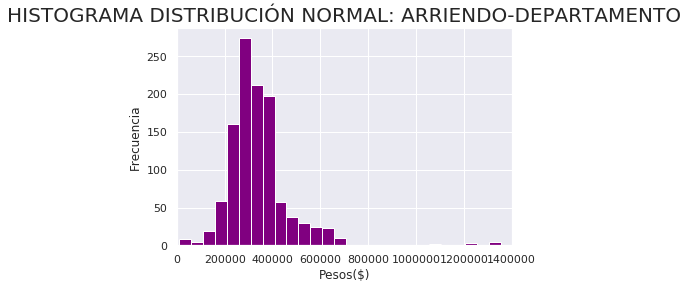

In [166]:
fig, ax = plt.subplots()
hist, bins = np.histogram(x, bins=50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, facecolor='purple')
plt.title('HISTOGRAMA DISTRIBUCIÓN NORMAL: ARRIENDO-DEPARTAMENTO',fontsize=20)
plt.xlabel('Pesos($)',fontsize=12)
plt.ylabel('Frecuencia',fontsize=12)
ax.set_xlim(0,1400000)

---

### Pregunta 7 : Visualización de datos

Implementar un script Python para visualizar un mapa donde se indica el precio promedio de los anuncios por cada región, por una categoría de anuncio particular.


* Mostramos el precio promedio de anuncios por región para la categoría __Vendo - Casa__.

In [149]:
cursor.execute("USE Yapo")

In [150]:
sql = "SELECT  codigo_region AS 'Código',nombre_region AS Región,avg(precio) AS 'PROMEDIO($)' FROM vendedor JOIN anuncio USING(id_vendedor) WHERE categoria = 'Vendo - Casa' AND moneda = '$' GROUP BY nombre_region, codigo_region ORDER BY avg(precio) DESC;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe["PROMEDIO($)"] = dataframe["PROMEDIO($)"].astype(int)
dataframe

,Código,Región,PROMEDIO($)
0,XVI,Ñuble,213071428
1,X,Los Lagos,181664444
2,VII,Maule,142800800
3,XV,Arica & Parinacota,136136363
4,I,Tarapacá,135000000
5,XII,Magallanes & Antártica,129300000
6,VIII,Biobío,119464516
7,Región,Metropolitana,116840591
8,XIV,Los Ríos,112428571
9,II,Antofagasta,101392857


> __NOTA:__ Para efectos de este ejercicio, y para no perder información se considerará a la la región del __Ñuble__ como parte de la región del __Biobío__ (que fue parte de esta región hasta el año 2017).

* Primero realizamos un backup de la base de datos ___Yapo___

In [26]:
!mysqldump -u root -p"password" Yapo > yapo_bp.sql

mysqldump: [Warning] Using a password on the command line interface can be insecure.


* Creamos una base de datos auxiliar, que utilizaremos para modificar la tabla vendedor.

In [36]:
cursor.execute("CREATE DATABASE yapoP7;")

* Importamos el archivo ___yapo_bp.sql___   a la nueva base de datos __yapoP7__

In [37]:
!mysql -u root -p"password" yapoP7 < yapo_bp.sql

mysql: [Warning] Using a password on the command line interface can be insecure.


In [139]:
cursor.execute("USE yapoP7")

* Se modifica en la tabla __vendedor__,las columnas __nombre_region__ y __codigo_region__ 

In [62]:
cursor.execute("USE yapoP7")
sql = "UPDATE vendedor SET nombre_region = REPLACE(nombre_region, 'Ñuble','Biobío');"
cursor.execute(sql)

In [63]:
sql = "UPDATE vendedor SET codigo_region = REPLACE(codigo_region, 'XVI','VIII');"
cursor.execute(sql)

* Nuevamente mostramos el precio promedio de anuncios por región, pero ahora considerando a la región del Ñuble parte de la región del Biobío.

In [140]:
sql = "SELECT  codigo_region AS 'Código',nombre_region AS Región,avg(precio) AS 'PROMEDIO($)' FROM vendedor JOIN anuncio USING(id_vendedor) WHERE categoria = 'Vendo - Casa' AND moneda = '$' GROUP BY nombre_region, codigo_region ORDER BY avg(precio) DESC;"
cursor.execute(sql)
dataframe = DataFrame(cursor.fetchall())
dataframe.columns = cursor.column_names
dataframe["PROMEDIO($)"] = dataframe["PROMEDIO($)"].astype(int)
dataframe

,Código,Región,PROMEDIO($)
0,X,Los Lagos,181664444
1,VIII,Biobío,163888135
2,VII,Maule,142800800
3,XV,Arica & Parinacota,136136363
4,I,Tarapacá,135000000
5,XII,Magallanes & Antártica,129300000
6,Región,Metropolitana,116840591
7,XIV,Los Ríos,112428571
8,II,Antofagasta,101392857
9,V,Valparaíso,79758138


* Utilizando geopandas mostramos el mapa, con el precio promedio de la categoría __Vendo - Casa__

In [141]:
import shapefile as shp

In [142]:
shp_path = "./cl_regiones_geo/cl_regiones_geo.shp"
sf = shp.Reader(shp_path, encoding="ISO8859-1")

In [143]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [144]:
dataframe.loc[dataframe.Región == "Metropolitana", "Región"] = "Metropolitana de Santiago"
dataframe.loc[dataframe.Región == "Valparaíso", "Región"] = "Valparaiso"
dataframe.loc[dataframe.Región == "Biobío", "Región"] = "Biobio"
dataframe.loc[dataframe.Región == "Magallanes & Antártica", "Región"] = "Magallanes y de la Antartica Chileno"
dataframe.loc[dataframe.Región == "Araucanía", "Región"] = "La Araucania"
dataframe.loc[dataframe.Región == "O'Higgins", "Región"] = "Libertador Gral. Bernardo O'Higgins"
dataframe.loc[dataframe.Región == "Los Ríos", "Región"] = "Los Rios"
dataframe.loc[dataframe.Región == "Tarapacá", "Región"] = "Tarapaca"
dataframe.loc[dataframe.Región == "Aisén", "Región"] = "Aisen del Gral. Carlos Ibañez del Campo"
dataframe.loc[dataframe.Región == "Arica & Parinacota", "Región"] = "Arica y Parinacota"

In [145]:
import geopandas as gpd
df_geo = gpd.read_file(shp_path)
df_geo

,ID_2002,NOMBRE,geometry
0,15,Arica y Parinacota,"POLYGON ((-70.26623 -19.19022, -70.27196 -19.1..."
1,01,Tarapaca,"POLYGON ((-70.28617 -19.22897, -70.13096 -19.1..."
2,02,Antofagasta,"POLYGON ((-68.48122 -20.94599, -68.48081 -20.9..."
3,03,Atacama,"POLYGON ((-68.54489 -25.29883, -68.54386 -25.3..."
4,04,Coquimbo,"POLYGON ((-69.95231 -29.50337, -69.95157 -29.5..."
5,05,Valparaiso,"POLYGON ((-70.31980 -32.27473, -70.31443 -32.2..."
6,13,Metropolitana de Santiago,"POLYGON ((-70.24362 -33.18739, -70.24229 -33.1..."
7,06,Libertador Gral. Bernardo O'Higgins,"POLYGON ((-70.03126 -34.28848, -70.03171 -34.2..."
8,07,Maule,"POLYGON ((-70.36378 -35.00388, -70.36476 -35.0..."
9,08,Biobio,"MULTIPOLYGON (((-73.68449 -37.36724, -73.68413..."


In [146]:
result = pd.concat([df_geo.set_index("NOMBRE"), dataframe.set_index("Región")], axis=1, join='inner')
result

,ID_2002,geometry,Código,PROMEDIO($)
Arica y Parinacota,15,"POLYGON ((-70.26623 -19.19022, -70.27196 -19.1...",XV,136136363
Tarapaca,01,"POLYGON ((-70.28617 -19.22897, -70.13096 -19.1...",I,135000000
Antofagasta,02,"POLYGON ((-68.48122 -20.94599, -68.48081 -20.9...",II,101392857
Atacama,03,"POLYGON ((-68.54489 -25.29883, -68.54386 -25.3...",III,53222222
Coquimbo,04,"POLYGON ((-69.95231 -29.50337, -69.95157 -29.5...",IV,40473684
Valparaiso,05,"POLYGON ((-70.31980 -32.27473, -70.31443 -32.2...",V,79758138
Metropolitana de Santiago,13,"POLYGON ((-70.24362 -33.18739, -70.24229 -33.1...",Región,116840591
Libertador Gral. Bernardo O'Higgins,06,"POLYGON ((-70.03126 -34.28848, -70.03171 -34.2...",VI,68675000
Maule,07,"POLYGON ((-70.36378 -35.00388, -70.36476 -35.0...",VII,142800800
Biobio,08,"MULTIPOLYGON (((-73.68449 -37.36724, -73.68413...",VIII,163888135


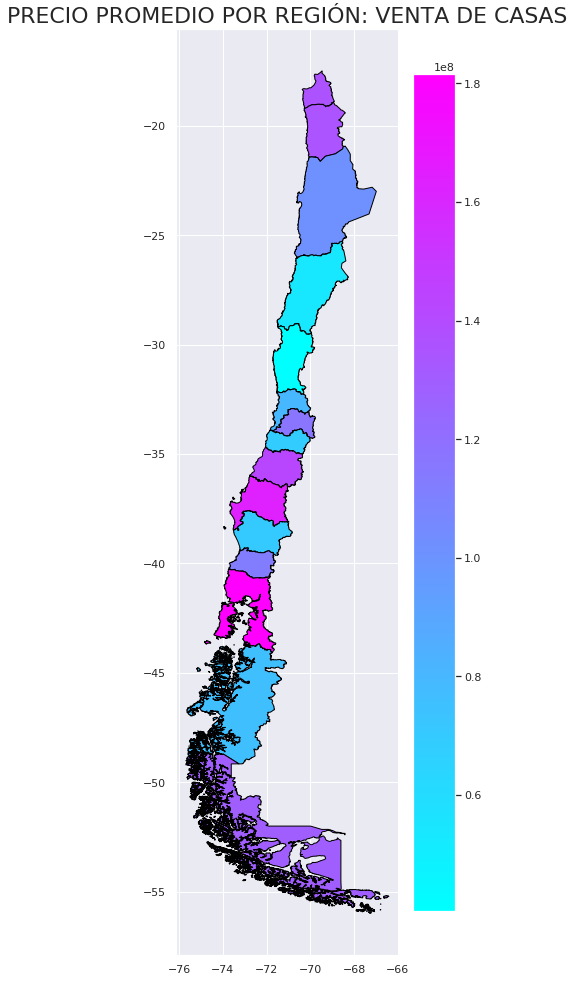

In [147]:
import geopandas as gpd
fig, ax = plt.subplots(figsize=(5,20))
result.plot(ax=ax,edgecolor='black',column='PROMEDIO($)', cmap='cool',legend=True,
        legend_kwds={'orientation': "vertical"})
ax.set_title("PRECIO PROMEDIO POR REGIÓN: VENTA DE CASAS", fontsize=22)
ax.set_aspect('equal')
plt.show()

---